In [ ]:
import numpy as np
import gym
import random
from IPython.display import clear_output
from time import sleep as sleep
import matplotlib.pyplot as plt

In [ ]:
env = gym.make("FrozenLake8x8-v0",is_slippery=True) #making environment (slippery property to add ranomness to the problem (stochastic))

In [ ]:
#no. of actions and states
n_actions = env.action_space.n
n_states = env.observation_space.n
n_actions, n_states 

(4, 64)

In [ ]:
#defining hyperparameters 
n_episodes = 10000
learning_rates = np.arange(0.01,0.25,0.01)
reward_per_la = []
max_steps = 275
gamma = 1.0
epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay = 0.006

In [ ]:
q_table = np.zeros((n_states,n_actions))
# making our q_table

In [ ]:
#Training the agent on the environment for 10,000 episodes
learning_rate = 0.06
rewards = []
rewards_thousands = []
rewards_per_hundred = []
for episode in range(n_episodes+1):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    total_rewards_thousands = 0
    
    for step in range(max_steps):
        e_e_tradeoff = random.uniform(0,1)

        if(e_e_tradeoff >= epsilon): # depending on random variable e_e_tradeoff we make our decision to exploit of explore (probability to explore approches 0 as training reach the end)
            action  = np.argmax(q_table[state,:])
        else:
            action = env.action_space.sample()

        new_state, reward, done, info  = env.step(action)
        #reward = 0 if cell is F, -10 if cell is H, 10 if cell is G
        if reward == 0 and done == True:
            q_table[state,action] = q_table[state,action] + learning_rate * ((reward-10) + gamma * np.max(q_table[new_state,:]) - q_table[state,action]);
        elif reward == 1 and done == True:
            q_table[state,action] = q_table[state,action] + learning_rate * ((reward+9) + gamma * np.max(q_table[new_state,:]) - q_table[state,action]);
        else:
            q_table[state,action] = q_table[state,action] + learning_rate * ((reward) + gamma * np.max(q_table[new_state,:]) - q_table[state,action]);
        
        total_rewards += reward
        total_rewards_thousands += reward

        state = new_state

        if(done == True):
            break
            
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay*episode) #epsilon decreases to make the agent exploit
    rewards.append(total_rewards)
    rewards_thousands.append(total_rewards_thousands)
    if episode % 100 == 0:
      reward_per_thousands = sum(rewards_thousands)/100
      print(f"Score over {episode} episode: " + str(reward_per_thousands))
      rewards_thousands = []
      rewards_per_hundred.append(reward_per_thousands)
    
print("Score over time: " + str(sum(rewards)/n_episodes))
print("Q-Table: ")
print(q_table)

Score over 0 episode: 0.0
Score over 100 episode: 0.01
Score over 200 episode: 0.09
Score over 300 episode: 0.24
Score over 400 episode: 0.36
Score over 500 episode: 0.36
Score over 600 episode: 0.57
Score over 700 episode: 0.3
Score over 800 episode: 0.42
Score over 900 episode: 0.27
Score over 1000 episode: 0.31
Score over 1100 episode: 0.42
Score over 1200 episode: 0.39
Score over 1300 episode: 0.39
Score over 1400 episode: 0.34
Score over 1500 episode: 0.36
Score over 1600 episode: 0.47
Score over 1700 episode: 0.48
Score over 1800 episode: 0.68
Score over 1900 episode: 0.73
Score over 2000 episode: 0.83
Score over 2100 episode: 0.77
Score over 2200 episode: 0.83
Score over 2300 episode: 0.7
Score over 2400 episode: 0.78
Score over 2500 episode: 0.74
Score over 2600 episode: 0.76
Score over 2700 episode: 0.78
Score over 2800 episode: 0.65
Score over 2900 episode: 0.48
Score over 3000 episode: 0.61
Score over 3100 episode: 0.73
Score over 3200 episode: 0.7
Score over 3300 episode: 0

In [ ]:
env.reset()
solved = 0

# lets test for 20 episodes and watches how it acts
for episode in range(20):
    state = env.reset()
    step = 0
    done = False
    print("XXXXXXXXXX")
    print("Episode: ",episode)
    
    for step in range(max_steps):
        env.render()
        print(episode,solved)
        clear_output(wait=True)
        sleep(0.1)
        action = np.argmax(q_table[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        if done:
            env.render()
            print("Number of steps taken: ",step)
            if reward == 1:
                solved += 1
                print("Solved EP")
            else:
                print("not Solved")
            sleep(0.2)
            break
            
        state = new_state
# clear_output(wait=True)
print(str(solved) + " of 20 is solved")
env.close()


  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Number of steps taken:  156
Solved EP
17 of 20 is solved


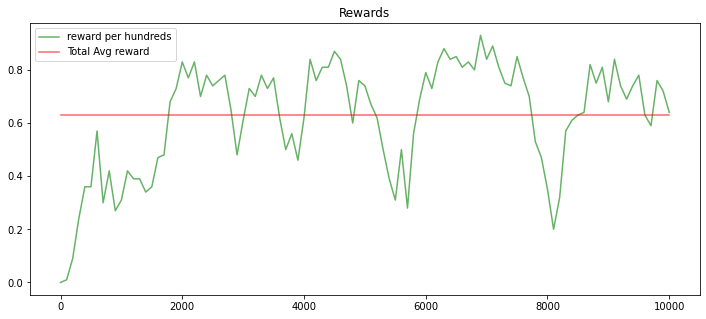

In [ ]:
#reward over a hundered ep should increase as we proceed in the training as the agent know the environment well
avg = []
for _ in range(0,10001,100):
  avg.append(sum(rewards)/n_episodes)
plt.figure(figsize=(12,5))
plt.title("Rewards")
plt.plot(np.arange(0,10001,100),rewards_per_hundred, alpha=0.6, color='green',label="reward per hundreds")
plt.plot(np.arange(0,10001,100),avg, alpha=0.6, color='red',label="Total Avg reward")
plt.legend()
plt.show()